# CEFET

**Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

** Trabalho 02**

* Disciplina: Aprendizado de Máquina
* Professor: Eduardo Bezerra
* Aluno: Janio de Souza Lima

# 1 Aprendizado Supervisionado Revisitado

## 1.1 Aprendizado com Regressores

### 1.1.1 Regressão com uma variável

**Carga e análise preliminar dos dados**

In [1]:
#library('')
arquivo <- "https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt"
dados <- read.table(arquivo,
                    header=FALSE,
                    sep=','
                   )

In [2]:
colnames(dados) <- c('Population', 'Profit')

In [3]:
head(dados)

Population,Profit
6.1101,17.5920
5.5277,9.1302
8.5186,13.6620
7.0032,11.8540
5.8598,6.8233
8.3829,11.8860


In [4]:
X <- dados$Population
y <- dados$Profit

In [5]:
summary(dados)

   Population         Profit      
 Min.   : 5.027   Min.   :-2.681  
 1st Qu.: 5.708   1st Qu.: 1.987  
 Median : 6.589   Median : 4.562  
 Mean   : 8.160   Mean   : 5.839  
 3rd Qu.: 8.578   3rd Qu.: 7.047  
 Max.   :22.203   Max.   :24.147  

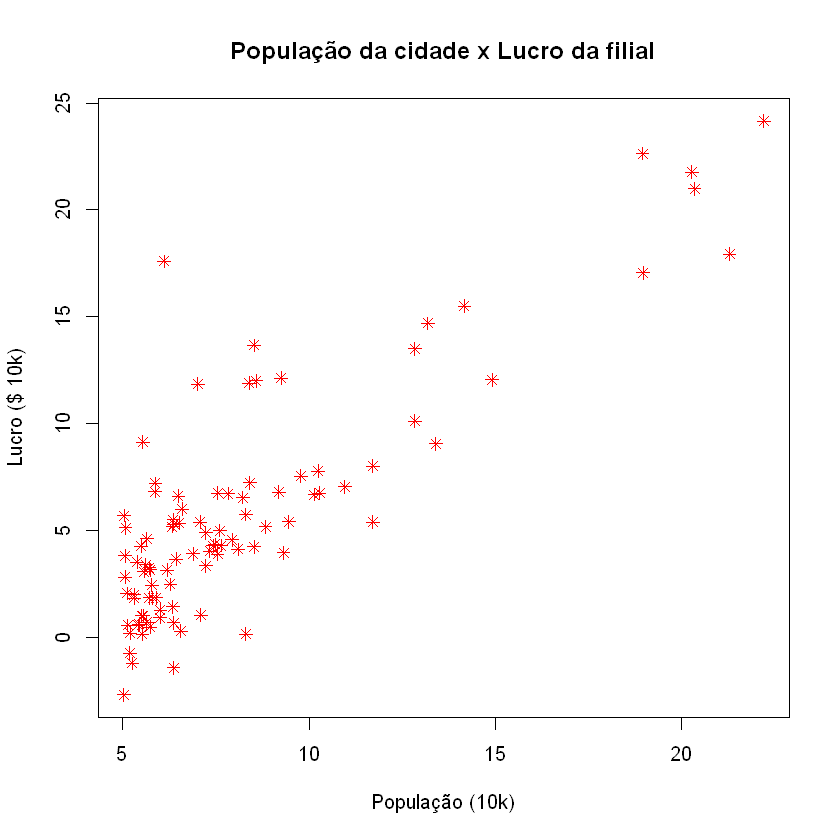

In [22]:
plot(dados$Population,
    dados$Profit,
    ylab="Lucro ($ 10k)",
    xlab="População (10k)",
    main="População da cidade x Lucro da filial",
    pch=8,
    col="red")

In [7]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [8]:
set.seed(42) #randomization

#creating indices
trainIndex <- createDataPartition(dados$Population,
                                  p=0.8,
                                  list=FALSE)

In [9]:
X.train <- X[trainIndex]
X.test <- X[-trainIndex]

In [10]:
y.train <- X[trainIndex]
y.test <- X[-trainIndex]

In [11]:
#splitting data into training/testing data using the trainIndex object
DADOS_TRAIN <- dados[trainIndex,] #training data (80% of data)
DADOS_TEST <- dados[-trainIndex,] #testing data (20% of data)

In [12]:
head(DADOS_TRAIN)

,Population,Profit
1,6.1101,17.5920
2,5.5277,9.1302
4,7.0032,11.8540
5,5.8598,6.8233
6,8.3829,11.8860
7,7.4764,4.3483


In [13]:
head(DADOS_TEST)

,Population,Profit
3,8.5186,13.6620
19,6.4296,3.6518
23,5.4901,4.2630
31,5.2524,-1.2200
35,8.2111,6.5426
46,7.0931,1.0463


#### Regressão Linear Simples

In [14]:
regLin <- lm(Profit ~ Population, data=DADOS_TRAIN)
regLin


Call:
lm(formula = Profit ~ Population, data = DADOS_TRAIN)

Coefficients:
(Intercept)   Population  
     -4.216        1.238  


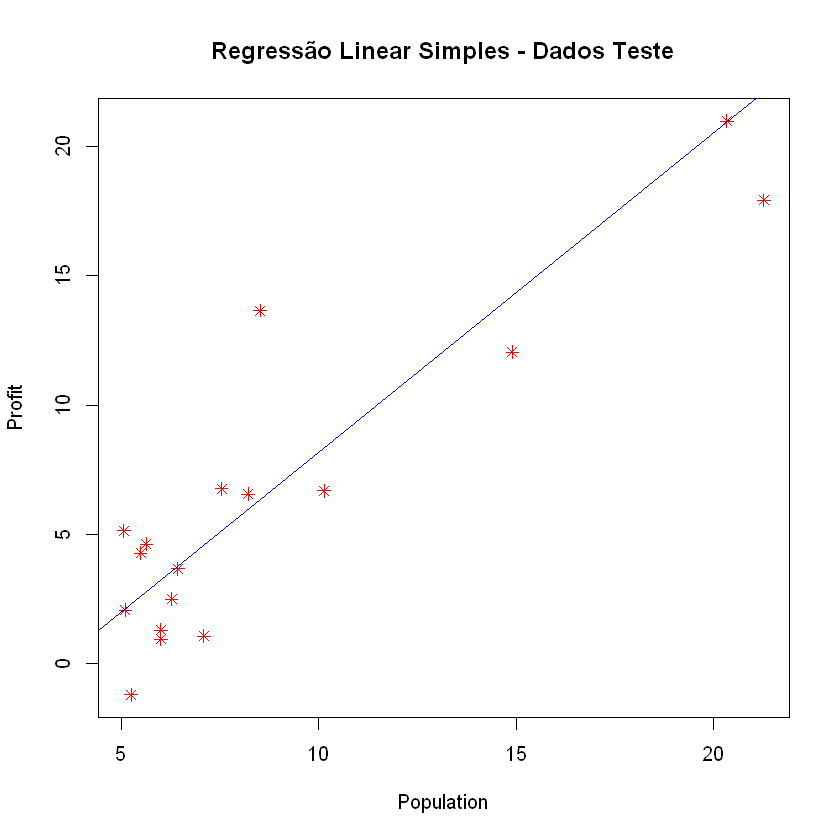

In [15]:
plot(Profit ~ Population, data=DADOS_TEST,
     col="red", main="Regressão Linear Simples - Dados Teste",
    pch=8)

abline(regLin, col="blue")

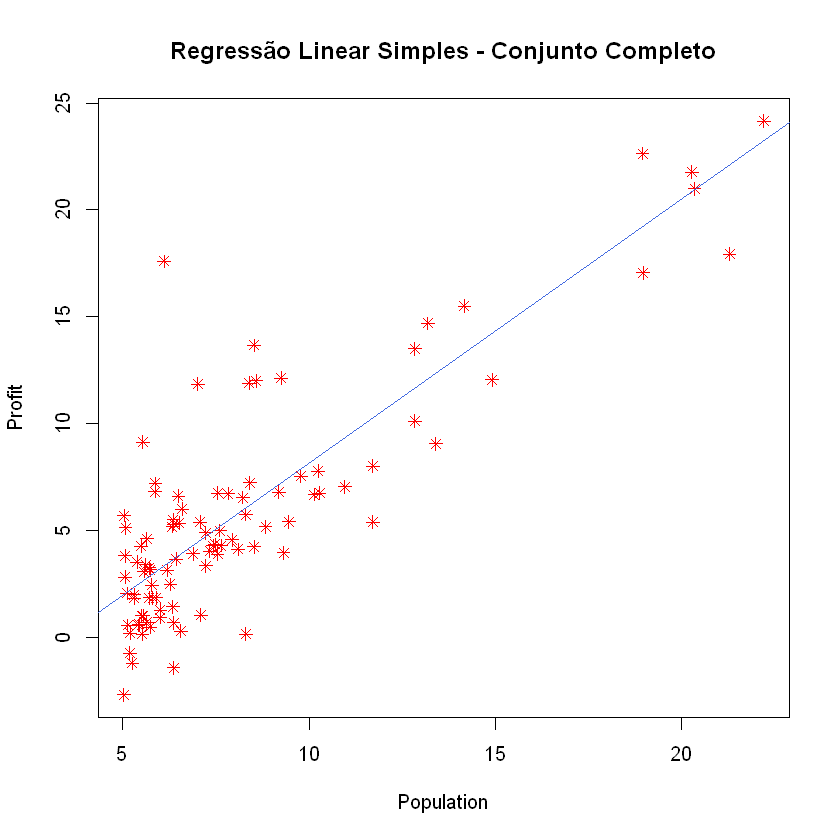

In [78]:
plot(Profit ~ Population, data=dados,
     col="red", main="Regressão Linear Simples - Conjunto Completo",
    pch=8)

abline(regLin, col="royalblue")

#### Aplicação do algoritmo k_NN

In [23]:
library(FNN)

Warning message:
"package 'FNN' was built under R version 3.6.3"

In [28]:
knnReg = knn.reg(train = as.data.frame(DADOS_TRAIN$Population),
                 test = NULL,
                 y = DADOS_TRAIN$Profit, k = 15)

knnReg

PRESS =  1235.674 
R2-Predict =  0.4588539 

In [31]:
y_pred = knn.reg(train = as.data.frame(DADOS_TRAIN$Population),
                 test = as.data.frame(DADOS_TEST$Population),
                 y = DADOS_TRAIN$Profit, k = 15)

In [32]:
y_pred

Prediction:
 [1]  6.267363  4.573379  2.173249  1.899561  5.575816  4.897199  1.899561
 [8]  4.718489  4.767499  2.597717 12.732267 11.483407 12.732267  7.422613
[15]  4.160643  1.899561  4.160643

In [33]:
#Função para cálculo do RMSE
rmse = function(actual, predicted) {
  sqrt(mean((actual - predicted) ^ 2))
}

In [35]:
#AValiação do modelo
rmse(DADOS_TEST$Profit, y_pred$pred)

[1] 3.6312

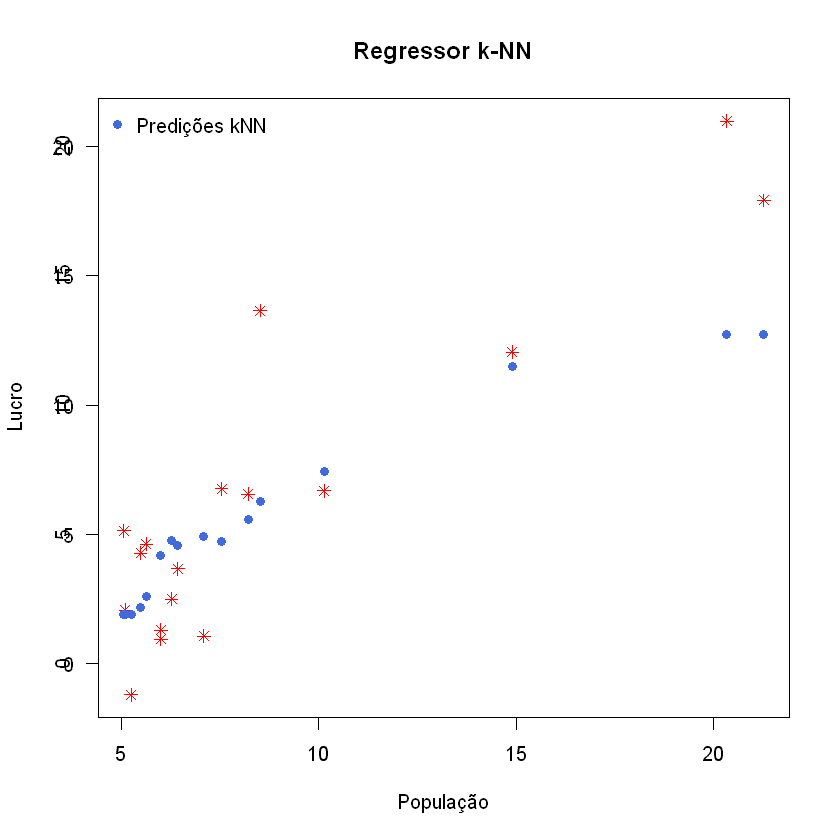

In [77]:
plot(DADOS_TEST$Population, DADOS_TEST$Profit, col="red", main="Regressor k-NN",
    xlab="População", ylab="Lucro", pch=8)

points(DADOS_TEST$Population, y_pred$pred, col="royalblue", pch=19)

box(bty = "l")

axis(side = 1)

axis(side = 2, 
     las = 1)

legend(x = "topleft",
       legend = "Predições kNN", 
       #lty = 1,
       #lwd = 3,
       bty = "n",
       col="royalblue", pch=19)

In [79]:
knnReg

PRESS =  1235.674 
R2-Predict =  0.4588539 

#### Aplicação do algoritmo Decision Tree